# FirstByte

### Project: FlexField Fitness Partnership Analysis

This project aims to analyze and visualize data for the FirstByte 2024 competition to assist FlexField Fitness in selecting the best partnership strategy. Through data-driven insights, we will explore customer behavior, product performance, and provide actionable recommendations.


In [1]:
install.packages("tidyverse")
library(tidyverse)
library(dplyr)
library(ggplot2)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository https://mirror.rcg.sfu.ca/mirror/CRAN/src/contrib:
  cannot open URL 'https://mirror.rcg.sfu.ca/mirror/CRAN/src/contrib/PACKAGES'”
Warning message:
“package ‘tidyverse’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<htt

#### Data Upload

In [2]:
chefs_meal <- read.csv("chefsmeal.csv")
coreboost <- read.csv("coreboost.csv")
flexfield_fitness <- read.csv("flexfield_fitness.csv")
pulsegear <- read.csv("pulsegear.csv")

#### Data cleaning
##### 1. check for missing values

In [3]:
colSums(is.na(flexfield_fitness))

Customer.ID                        Gender 
                            0                             0 
                          Age       Hours.at.Gym..per.week. 
                            0                            65 
                 Fitness.Goal Gym.Membership.Length..years. 
                            0                             0 
               Calorie.Intake 
                           39

In [4]:
colSums(is.na(chefs_meal))

Customer.ID                       Gender 
                           0                            0 
                         Age      Hours.at.Gym..per.week. 
                           0                           65 
                Fitness.Goal               Calorie.Intake 
                           0                           39 
         Dietary.Preferences Average.Spend.per.Meal.Order 
                           0                           42

In [5]:
colSums(is.na(coreboost))

Customer.ID                               Gender 
                                   0                                    0 
                                 Age              Hours.at.Gym..per.week. 
                                   0                                   65 
                        Fitness.Goal          Preferred.Sports.Drink.Type 
                                   0                                    0 
Average.Weekly.Consumption..Bottles. 
                                   0

In [6]:
colSums(is.na(pulsegear));

Customer.ID                            Gender 
                                0                                 0 
                              Age           Hours.at.Gym..per.week. 
                                0                                65 
                     Fitness.Goal Average.Spend.on.Apparel....year. 
                                0                                 0 
        Type.of.Apparel.Purchased  Primary.Apparel.Purchase.Channel 
                                0                                 0

##### 2. checking if values in all common columns in the datasets are the same

In [7]:
# # List of common columns to check
# common_columns <- c("Customer.ID", "Gender", "Age", "Hours.at.Gym..per.week.", "Fitness.Goal")

# # Loop through each common column to check for row-by-row differences
# for (col in common_columns) {
#   # Check if values are identical row-by-row across all datasets for the column
#   differences <- (flexfield_fitness[[col]] != chefs_meal[[col]]) |
#                  (flexfield_fitness[[col]] != coreboost[[col]]) |
#                  (flexfield_fitness[[col]] != pulsegear[[col]])
  
#   # Filter and print only rows with differences for this column
#   if (any(differences, na.rm = TRUE)) {
#     cat("Differences found in column:", col, "\n")
#     diff_rows <- data.frame(
#       Row = which(differences),  # Row number
#       Customer.ID = flexfield_fitness$Customer.ID[differences],
#       flexfield_fitness = flexfield_fitness[[col]][differences],
#       chefs_meal = chefs_meal[[col]][differences],
#       coreboost = coreboost[[col]][differences],
#       pulsegear = pulsegear[[col]][differences]
#     )
#     print(diff_rows)
#     cat("\n")
#   } else {
#     cat("No differences found in column:", col, "\n")
#   }
# }

##### it is checked that same columns contain the same values across all datasets
##### now integrating all the datasets into one

In [8]:
# Remove common columns from each dataset before merging
chefs_meal <- chefs_meal %>% select(-Gender, -Age, -Hours.at.Gym..per.week., -Fitness.Goal)
coreboost <- coreboost %>% select(-Gender, -Age, -Hours.at.Gym..per.week., -Fitness.Goal)
pulsegear <- pulsegear %>% select(-Gender, -Age, -Hours.at.Gym..per.week., -Fitness.Goal)

In [9]:
integrated_data <- flexfield_fitness %>%
  left_join(chefs_meal, by = "Customer.ID") %>%
  left_join(coreboost, by = "Customer.ID") %>%
  left_join(pulsegear, by = "Customer.ID")

In [10]:
glimpse(integrated_data)
summary(integrated_data)

Rows: 1,000
Columns: 15
$ Customer.ID                          <int> 221958, 771155, 231932, 465838, 3…
$ Gender                               <chr> "Female", "Female", "Male", "Fema…
$ Age                                  <int> 27, 24, 22, 23, 18, 23, 30, 26, 3…
$ Hours.at.Gym..per.week.              <dbl> 7.3, 6.2, 7.4, 6.0, 9.3, 5.7, 5.5…
$ Fitness.Goal                         <chr> "Build muscle", "Endurance traini…
$ Gym.Membership.Length..years.        <int> 4, 4, 2, 0, 5, 1, 2, 1, 4, 0, 1, …
$ Calorie.Intake.x                     <dbl> NA, 2173, 1752, 2884, 2559, 1606,…
$ Calorie.Intake.y                     <dbl> NA, 2173, 1752, 2884, 2559, 1606,…
$ Dietary.Preferences                  <chr> "Whole foods", "Whole foods", "Wh…
$ Average.Spend.per.Meal.Order         <dbl> 67.15, 52.94, 38.13, 61.44, 69.78…
$ Preferred.Sports.Drink.Type          <chr> "Electrolyte", "Electrolyte", "El…
$ Average.Weekly.Consumption..Bottles. <int> 10, 11, 12, 10, 14, 10, 10, 10, 1…
$ Average.Spend.

  Customer.ID        Gender               Age        Hours.at.Gym..per.week.
 Min.   :100404   Length:1000        Min.   :18.00   Min.   : 3.000         
 1st Qu.:301536   Class :character   1st Qu.:23.00   1st Qu.: 5.300         
 Median :538556   Mode  :character   Median :27.00   Median : 6.100         
 Mean   :538112                      Mean   :27.13   Mean   : 6.149         
 3rd Qu.:762517                      3rd Qu.:31.00   3rd Qu.: 7.100         
 Max.   :999684                      Max.   :44.00   Max.   :10.300         
                                                     NA's   :65             
 Fitness.Goal       Gym.Membership.Length..years. Calorie.Intake.x
 Length:1000        Min.   :0.000                 Min.   :1500    
 Class :character   1st Qu.:1.000                 1st Qu.:1922    
 Mode  :character   Median :2.000                 Median :2321    
                    Mean   :2.507                 Mean   :2295    
                    3rd Qu.:4.000                

In [11]:
# Combine the two columns, using .x if available, otherwise using .y
integrated_data$Calorie.Intake <- ifelse(!is.na(integrated_data$Calorie.Intake.x), 
                                         integrated_data$Calorie.Intake.x, 
                                         integrated_data$Calorie.Intake.y)

# Remove the original columns with .x and .y suffixes
integrated_data <- integrated_data %>%
  select(-Calorie.Intake.x, -Calorie.Intake.y)

# Verify the result
glimpse(integrated_data)

Rows: 1,000
Columns: 14
$ Customer.ID                          <int> 221958, 771155, 231932, 465838, 3…
$ Gender                               <chr> "Female", "Female", "Male", "Fema…
$ Age                                  <int> 27, 24, 22, 23, 18, 23, 30, 26, 3…
$ Hours.at.Gym..per.week.              <dbl> 7.3, 6.2, 7.4, 6.0, 9.3, 5.7, 5.5…
$ Fitness.Goal                         <chr> "Build muscle", "Endurance traini…
$ Gym.Membership.Length..years.        <int> 4, 4, 2, 0, 5, 1, 2, 1, 4, 0, 1, …
$ Dietary.Preferences                  <chr> "Whole foods", "Whole foods", "Wh…
$ Average.Spend.per.Meal.Order         <dbl> 67.15, 52.94, 38.13, 61.44, 69.78…
$ Preferred.Sports.Drink.Type          <chr> "Electrolyte", "Electrolyte", "El…
$ Average.Weekly.Consumption..Bottles. <int> 10, 11, 12, 10, 14, 10, 10, 10, 1…
$ Average.Spend.on.Apparel....year.    <dbl> 643.34, 659.13, 761.12, 234.87, 5…
$ Type.of.Apparel.Purchased            <chr> "Accessories", "Leisure", "Perfor…
$ Primary.Appare

##### calorie intake has a few NA values. now determining the variable calorie intake depends upon.

In [12]:
numeric_columns <- integrated_data %>%
  select(Age, Hours.at.Gym..per.week., Gym.Membership.Length..years., 
         Average.Spend.per.Meal.Order, Average.Weekly.Consumption..Bottles., 
         Average.Spend.on.Apparel....year., Calorie.Intake)

# Calculate correlation matrix
correlation_matrix <- cor(numeric_columns, use = "complete.obs")
print(correlation_matrix)

                                              Age Hours.at.Gym..per.week.
Age                                   1.000000000             -0.31373620
Hours.at.Gym..per.week.              -0.313736202              1.00000000
Gym.Membership.Length..years.         0.026679710              0.65131765
Average.Spend.per.Meal.Order         -0.033808280             -0.02164585
Average.Weekly.Consumption..Bottles. -0.142838215              0.38431616
Average.Spend.on.Apparel....year.     0.059456313              0.02116916
Calorie.Intake                        0.007640374             -0.06357413
                                     Gym.Membership.Length..years.
Age                                                     0.02667971
Hours.at.Gym..per.week.                                 0.65131765
Gym.Membership.Length..years.                           1.00000000
Average.Spend.per.Meal.Order                            0.08895411
Average.Weekly.Consumption..Bottles.                    0.27722957
Averag

Warning message:
“Removed 39 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 39 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


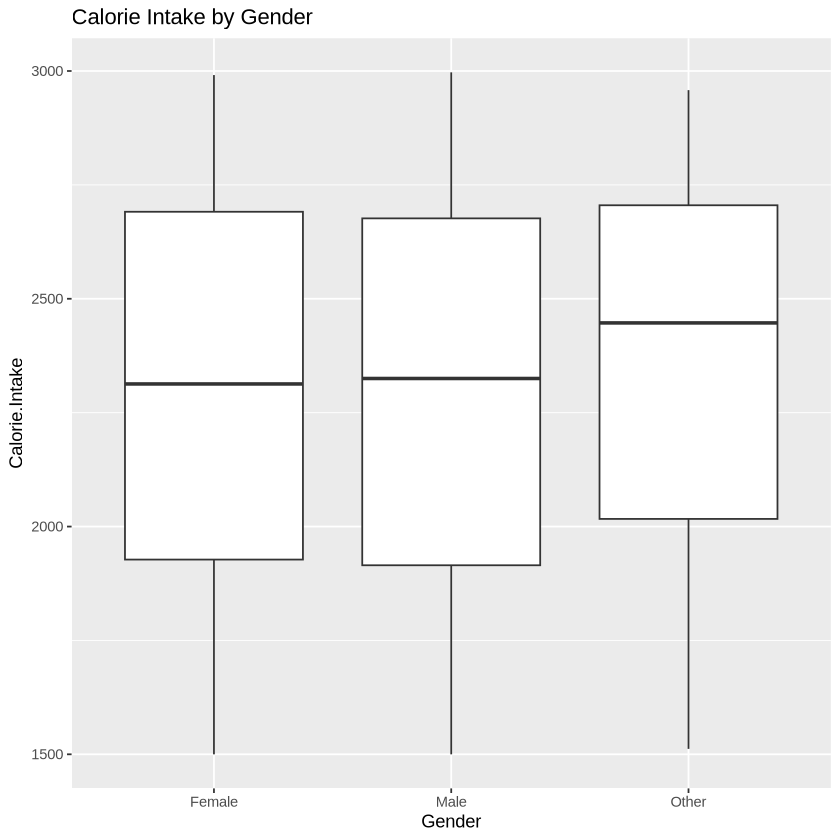

Warning message:
“Removed 39 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


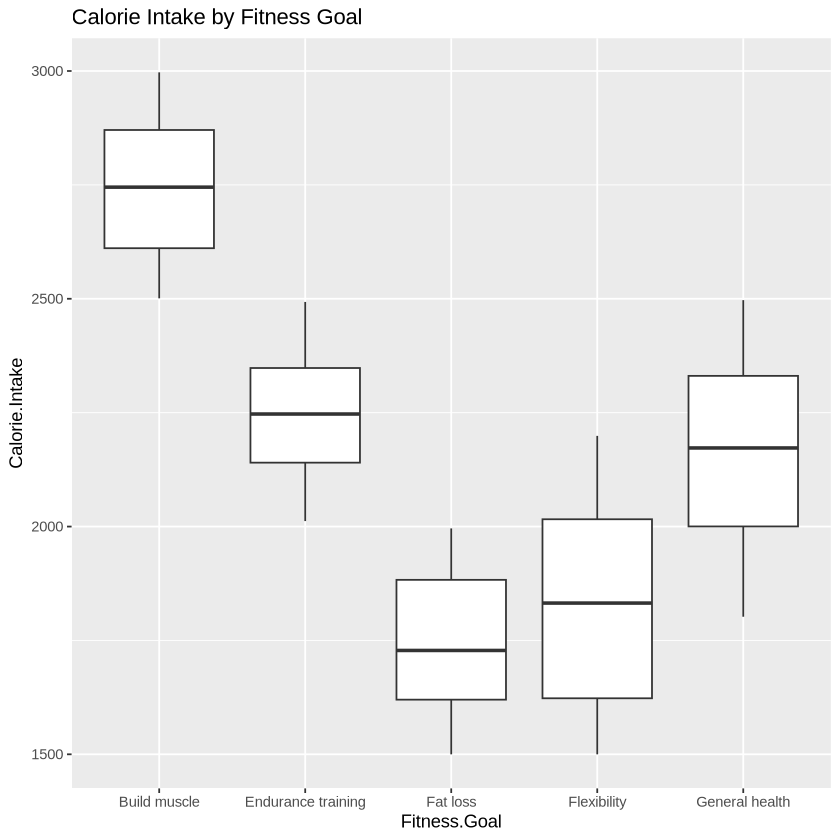

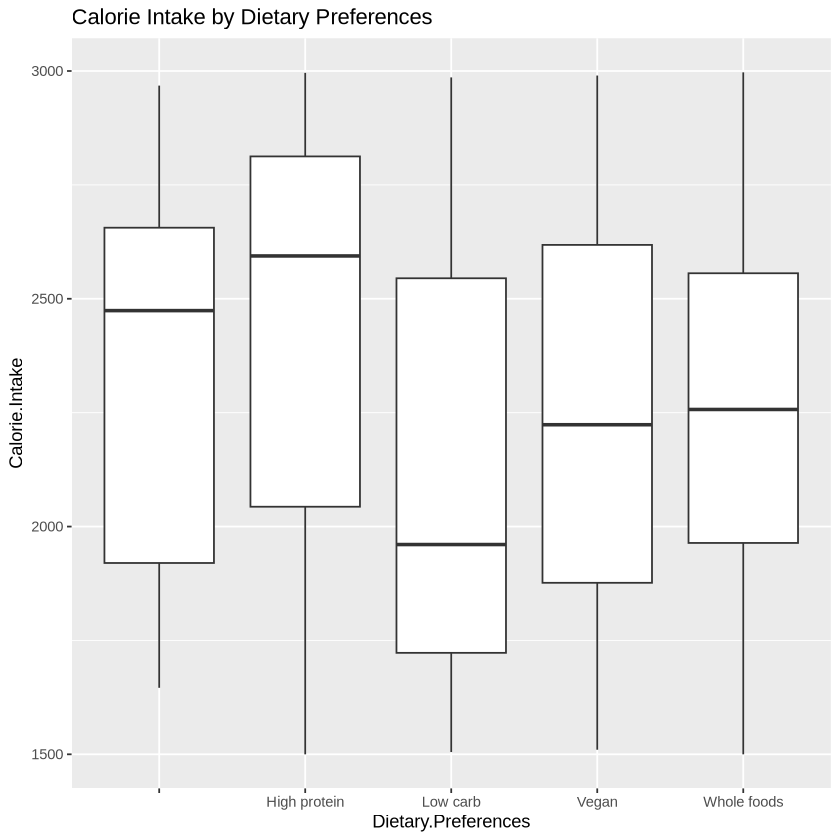

In [13]:
library(ggplot2)

# Boxplot for Calorie Intake by Gender
ggplot(integrated_data, aes(x = Gender, y = Calorie.Intake)) +
  geom_boxplot() +
  labs(title = "Calorie Intake by Gender")

# Boxplot for Calorie Intake by Fitness Goal
ggplot(integrated_data, aes(x = Fitness.Goal, y = Calorie.Intake)) +
  geom_boxplot() +
  labs(title = "Calorie Intake by Fitness Goal")

# Boxplot for Calorie Intake by Dietary Preferences
ggplot(integrated_data, aes(x = Dietary.Preferences, y = Calorie.Intake)) +
  geom_boxplot() +
  labs(title = "Calorie Intake by Dietary Preferences")

In [14]:
model <- lm(Calorie.Intake ~ Age + Hours.at.Gym..per.week. + Gym.Membership.Length..years. +
            Average.Spend.per.Meal.Order + Average.Weekly.Consumption..Bottles. +
            Average.Spend.on.Apparel....year. + Gender + Fitness.Goal + Dietary.Preferences,
            data = integrated_data)

# Summarize the model
summary(model)


Call:
lm(formula = Calorie.Intake ~ Age + Hours.at.Gym..per.week. + 
    Gym.Membership.Length..years. + Average.Spend.per.Meal.Order + 
    Average.Weekly.Consumption..Bottles. + Average.Spend.on.Apparel....year. + 
    Gender + Fitness.Goal + Dietary.Preferences, data = integrated_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-412.14 -102.42    6.96  102.01  357.76 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          1960.07002   75.61385  25.922  < 2e-16 ***
Age                                     1.19157    1.09689   1.086 0.277647    
Hours.at.Gym..per.week.               -16.84891    7.24999  -2.324 0.020363 *  
Gym.Membership.Length..years.           2.14937    4.58410   0.469 0.639279    
Average.Spend.per.Meal.Order           13.77346    0.75407  18.265  < 2e-16 ***
Average.Weekly.Consumption..Bottles.    2.12568    2.03994   1.042 0.297696    
Average.Spend.on.Apparel....year.      -

In [15]:
# Calculate the average Calorie.Intake for each combination of Fitness.Goal and Dietary.Preferences
group_means <- integrated_data %>%
  group_by(Fitness.Goal, Dietary.Preferences) %>%
  summarise(mean_calorie_intake = mean(Calorie.Intake, na.rm = TRUE), .groups = 'drop')

# Fill in missing Calorie.Intake values based on group means
integrated_data <- integrated_data %>%
  left_join(group_means, by = c("Fitness.Goal", "Dietary.Preferences")) %>%
  mutate(Calorie.Intake = ifelse(is.na(Calorie.Intake), mean_calorie_intake, Calorie.Intake)) %>%
  select(-mean_calorie_intake) # Remove the temporary column

# Verify the result
sum(is.na(integrated_data$Calorie.Intake))

[1] 0

In [16]:
colSums(is.na(integrated_data))

Customer.ID                               Gender 
                                   0                                    0 
                                 Age              Hours.at.Gym..per.week. 
                                   0                                   65 
                        Fitness.Goal        Gym.Membership.Length..years. 
                                   0                                    0 
                 Dietary.Preferences         Average.Spend.per.Meal.Order 
                                   0                                   42 
         Preferred.Sports.Drink.Type Average.Weekly.Consumption..Bottles. 
                                   0                                    0 
   Average.Spend.on.Apparel....year.            Type.of.Apparel.Purchased 
                                   0                                    0 
    Primary.Apparel.Purchase.Channel                       Calorie.Intake 
                                   0                                    0

In [17]:
# Select relevant numerical columns
numeric_columns <- integrated_data %>%
  select(Age, Hours.at.Gym..per.week., Gym.Membership.Length..years., 
         Calorie.Intake, Average.Weekly.Consumption..Bottles., 
         Average.Spend.on.Apparel....year., Average.Spend.per.Meal.Order)

# Calculate correlation matrix
correlation_matrix <- cor(numeric_columns, use = "complete.obs")
print(correlation_matrix)

                                              Age Hours.at.Gym..per.week.
Age                                   1.000000000             -0.32276478
Hours.at.Gym..per.week.              -0.322764782              1.00000000
Gym.Membership.Length..years.         0.016811234              0.65891612
Calorie.Intake                        0.003635904             -0.05613725
Average.Weekly.Consumption..Bottles. -0.148706451              0.39986194
Average.Spend.on.Apparel....year.     0.050361975              0.02113767
Average.Spend.per.Meal.Order         -0.034495453             -0.01686721
                                     Gym.Membership.Length..years.
Age                                                     0.01681123
Hours.at.Gym..per.week.                                 0.65891612
Gym.Membership.Length..years.                           1.00000000
Calorie.Intake                                          0.04322879
Average.Weekly.Consumption..Bottles.                    0.29390969
Averag

Warning message:
“Removed 42 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 42 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


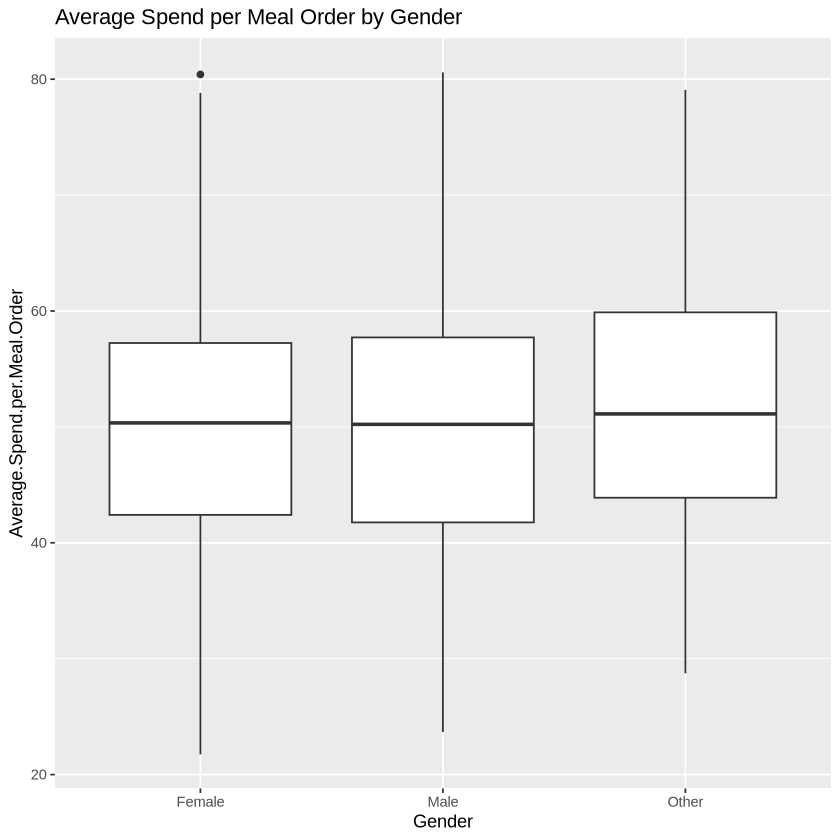

Warning message:
“Removed 42 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


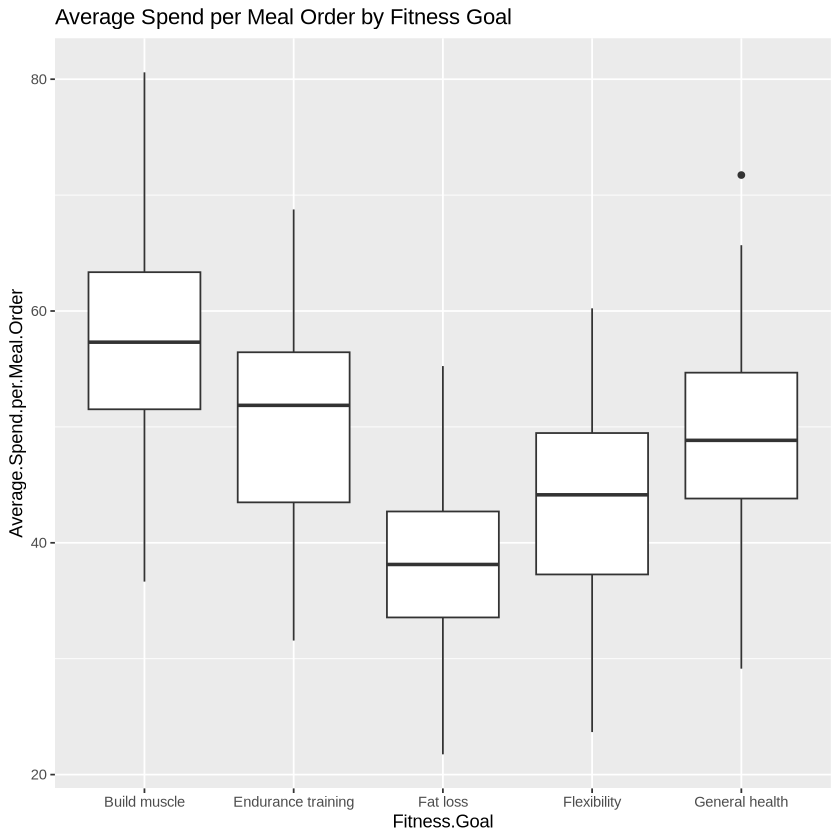

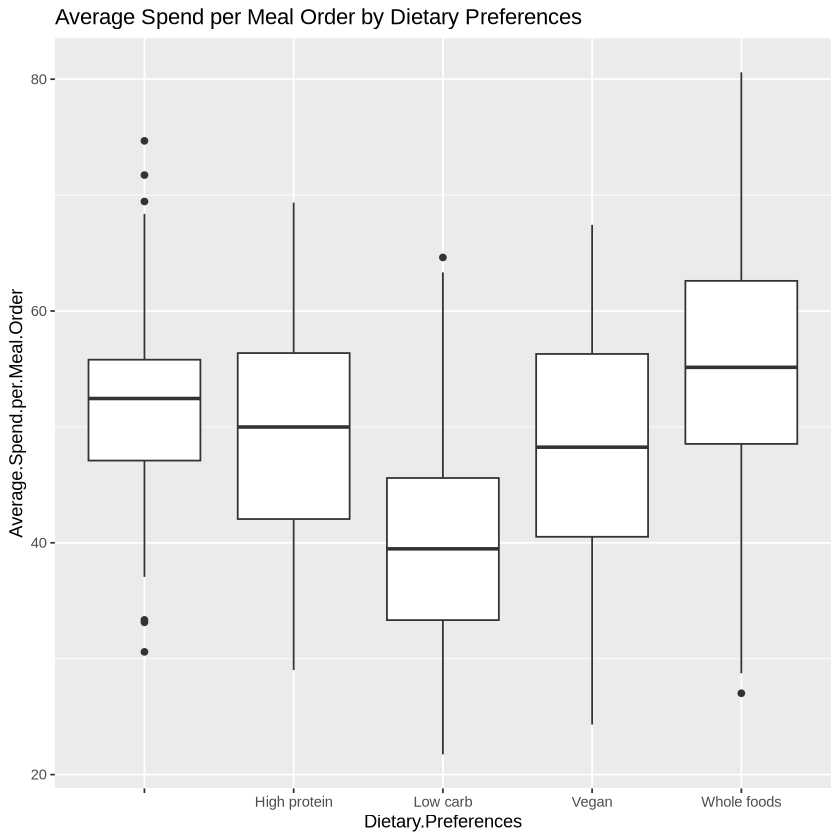

In [18]:
library(ggplot2)

# Boxplot for Average Spend per Meal Order by Gender
ggplot(integrated_data, aes(x = Gender, y = Average.Spend.per.Meal.Order)) +
  geom_boxplot() +
  labs(title = "Average Spend per Meal Order by Gender")

# Boxplot for Average Spend per Meal Order by Fitness Goal
ggplot(integrated_data, aes(x = Fitness.Goal, y = Average.Spend.per.Meal.Order)) +
  geom_boxplot() +
  labs(title = "Average Spend per Meal Order by Fitness Goal")

# Boxplot for Average Spend per Meal Order by Dietary Preferences
ggplot(integrated_data, aes(x = Dietary.Preferences, y = Average.Spend.per.Meal.Order)) +
  geom_boxplot() +
  labs(title = "Average Spend per Meal Order by Dietary Preferences")

In [19]:
# Build a linear regression model
model_spend <- lm(Average.Spend.per.Meal.Order ~ Age + Hours.at.Gym..per.week. + Gym.Membership.Length..years. +
                  Calorie.Intake + Average.Weekly.Consumption..Bottles. + Average.Spend.on.Apparel....year. +
                  Gender + Fitness.Goal + Dietary.Preferences, 
                  data = integrated_data)

# Summarize the model
summary(model_spend)


Call:
lm(formula = Average.Spend.per.Meal.Order ~ Age + Hours.at.Gym..per.week. + 
    Gym.Membership.Length..years. + Calorie.Intake + Average.Weekly.Consumption..Bottles. + 
    Average.Spend.on.Apparel....year. + Gender + Fitness.Goal + 
    Dietary.Preferences, data = integrated_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.4641  -3.5117   0.1021   3.5846  15.6681 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          -0.788538   3.915289  -0.201   0.8404    
Age                                  -0.057290   0.042014  -1.364   0.1730    
Hours.at.Gym..per.week.               0.755563   0.277495   2.723   0.0066 ** 
Gym.Membership.Length..years.         0.090232   0.175629   0.514   0.6075    
Calorie.Intake                        0.020622   0.001129  18.266  < 2e-16 ***
Average.Weekly.Consumption..Bottles. -0.003191   0.077744  -0.041   0.9673    
Average.Spend.on.Apparel....year.    

In [20]:
# Calculate the average Calorie.Intake for each combination of Fitness.Goal and Dietary.Preferences
group_means2 <- integrated_data %>%
  group_by(Dietary.Preferences, Average.Weekly.Consumption..Bottles.) %>%
  summarise(mean_spend = mean(Average.Spend.per.Meal.Order, na.rm = TRUE), .groups = 'drop')

# Fill in missing Calorie.Intake values based on group means
integrated_data <- integrated_data %>%
  left_join(group_means2, by = c("Dietary.Preferences", "Average.Weekly.Consumption..Bottles.")) %>%
  mutate(Average.Spend.per.Meal.Order = ifelse(is.na(Average.Spend.per.Meal.Order), mean_spend, Average.Spend.per.Meal.Order)) %>%
  select(-mean_spend) # Remove the temporary column

# Verify the result
sum(is.na(integrated_data$Average.Spend.per.Meal.Order))

[1] 0

In [21]:
glimpse(integrated_data)

Rows: 1,000
Columns: 14
$ Customer.ID                          <int> 221958, 771155, 231932, 465838, 3…
$ Gender                               <chr> "Female", "Female", "Male", "Fema…
$ Age                                  <int> 27, 24, 22, 23, 18, 23, 30, 26, 3…
$ Hours.at.Gym..per.week.              <dbl> 7.3, 6.2, 7.4, 6.0, 9.3, 5.7, 5.5…
$ Fitness.Goal                         <chr> "Build muscle", "Endurance traini…
$ Gym.Membership.Length..years.        <int> 4, 4, 2, 0, 5, 1, 2, 1, 4, 0, 1, …
$ Dietary.Preferences                  <chr> "Whole foods", "Whole foods", "Wh…
$ Average.Spend.per.Meal.Order         <dbl> 67.15, 52.94, 38.13, 61.44, 69.78…
$ Preferred.Sports.Drink.Type          <chr> "Electrolyte", "Electrolyte", "El…
$ Average.Weekly.Consumption..Bottles. <int> 10, 11, 12, 10, 14, 10, 10, 10, 1…
$ Average.Spend.on.Apparel....year.    <dbl> 643.34, 659.13, 761.12, 234.87, 5…
$ Type.of.Apparel.Purchased            <chr> "Accessories", "Leisure", "Perfor…
$ Primary.Appare

In [22]:
summary(integrated_data)

  Customer.ID        Gender               Age        Hours.at.Gym..per.week.
 Min.   :100404   Length:1000        Min.   :18.00   Min.   : 3.000         
 1st Qu.:301536   Class :character   1st Qu.:23.00   1st Qu.: 5.300         
 Median :538556   Mode  :character   Median :27.00   Median : 6.100         
 Mean   :538112                      Mean   :27.13   Mean   : 6.149         
 3rd Qu.:762517                      3rd Qu.:31.00   3rd Qu.: 7.100         
 Max.   :999684                      Max.   :44.00   Max.   :10.300         
                                                     NA's   :65             
 Fitness.Goal       Gym.Membership.Length..years. Dietary.Preferences
 Length:1000        Min.   :0.000                 Length:1000        
 Class :character   1st Qu.:1.000                 Class :character   
 Mode  :character   Median :2.000                 Mode  :character   
                    Mean   :2.507                                    
                    3rd Qu.:4.000 

In [23]:
colSums(is.na(integrated_data))

Customer.ID                               Gender 
                                   0                                    0 
                                 Age              Hours.at.Gym..per.week. 
                                   0                                   65 
                        Fitness.Goal        Gym.Membership.Length..years. 
                                   0                                    0 
                 Dietary.Preferences         Average.Spend.per.Meal.Order 
                                   0                                    0 
         Preferred.Sports.Drink.Type Average.Weekly.Consumption..Bottles. 
                                   0                                    0 
   Average.Spend.on.Apparel....year.            Type.of.Apparel.Purchased 
                                   0                                    0 
    Primary.Apparel.Purchase.Channel                       Calorie.Intake 
                                   0                                    0

In [24]:
# Select relevant numerical columns
numeric_columns_gym <- integrated_data %>%
  select(Hours.at.Gym..per.week., Age, Calorie.Intake, Gym.Membership.Length..years.,
         Average.Spend.per.Meal.Order, Average.Weekly.Consumption..Bottles., Average.Spend.on.Apparel....year.)

# Calculate correlation matrix
correlation_matrix_gym <- cor(numeric_columns_gym, use = "complete.obs")
print(correlation_matrix_gym)

                                     Hours.at.Gym..per.week.         Age
Hours.at.Gym..per.week.                           1.00000000 -0.31709453
Age                                              -0.31709453  1.00000000
Calorie.Intake                                   -0.06325940  0.01062716
Gym.Membership.Length..years.                     0.65292327  0.02755500
Average.Spend.per.Meal.Order                     -0.02025881 -0.03490870
Average.Weekly.Consumption..Bottles.              0.39360923 -0.14289192
Average.Spend.on.Apparel....year.                 0.01946026  0.04317453
                                     Calorie.Intake
Hours.at.Gym..per.week.                 -0.06325940
Age                                      0.01062716
Calorie.Intake                           1.00000000
Gym.Membership.Length..years.            0.03706987
Average.Spend.per.Meal.Order             0.71053814
Average.Weekly.Consumption..Bottles.     0.02816611
Average.Spend.on.Apparel....year.       -0.01828948


Warning message:
“Removed 65 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 65 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


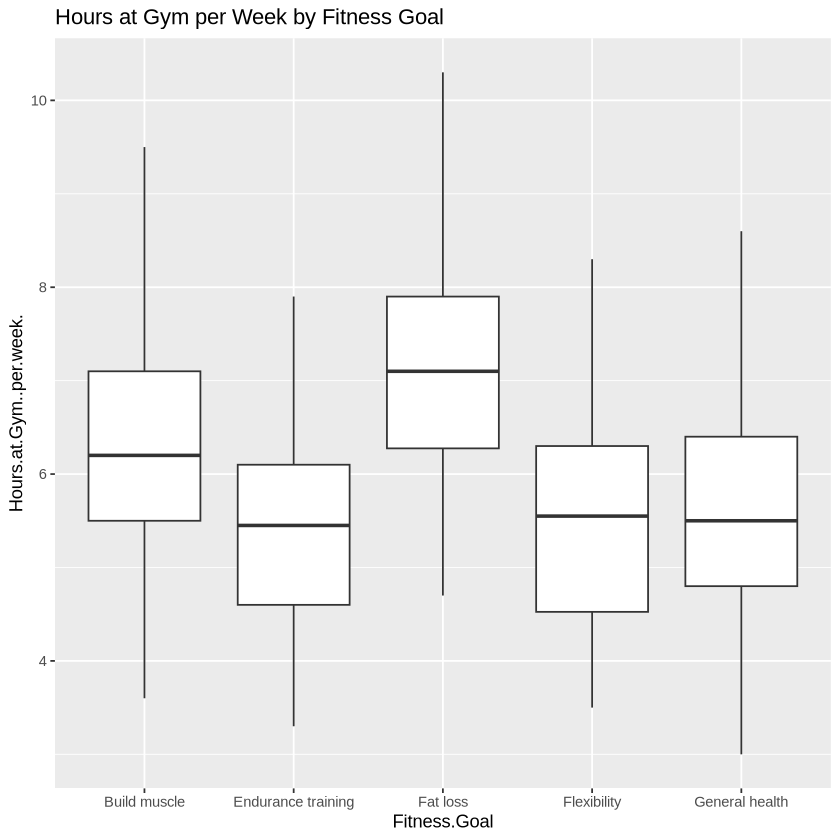

Warning message:
“Removed 65 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


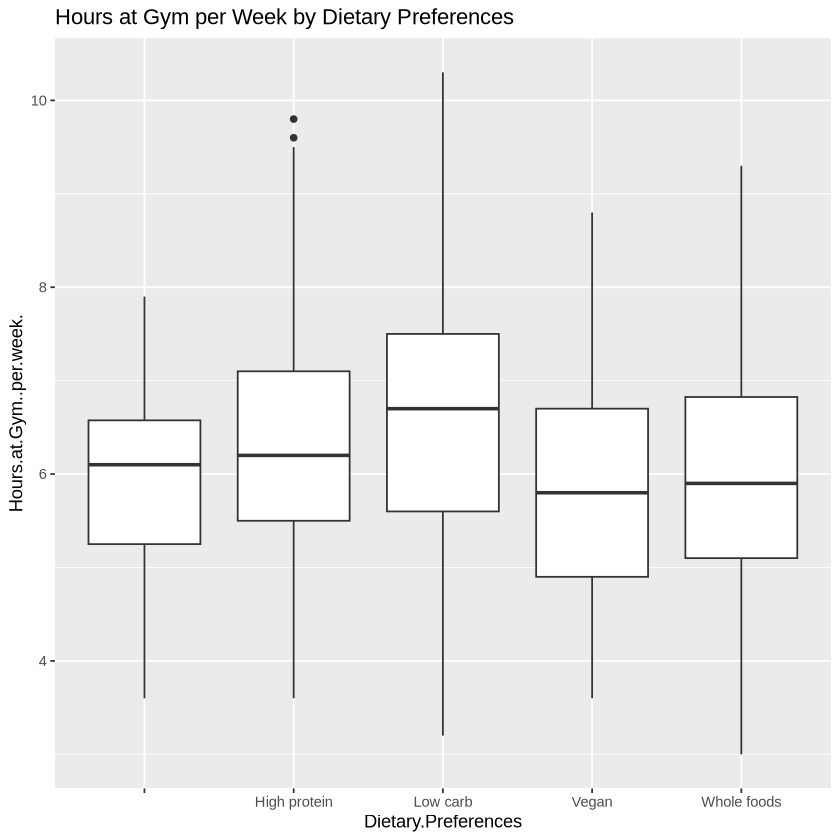

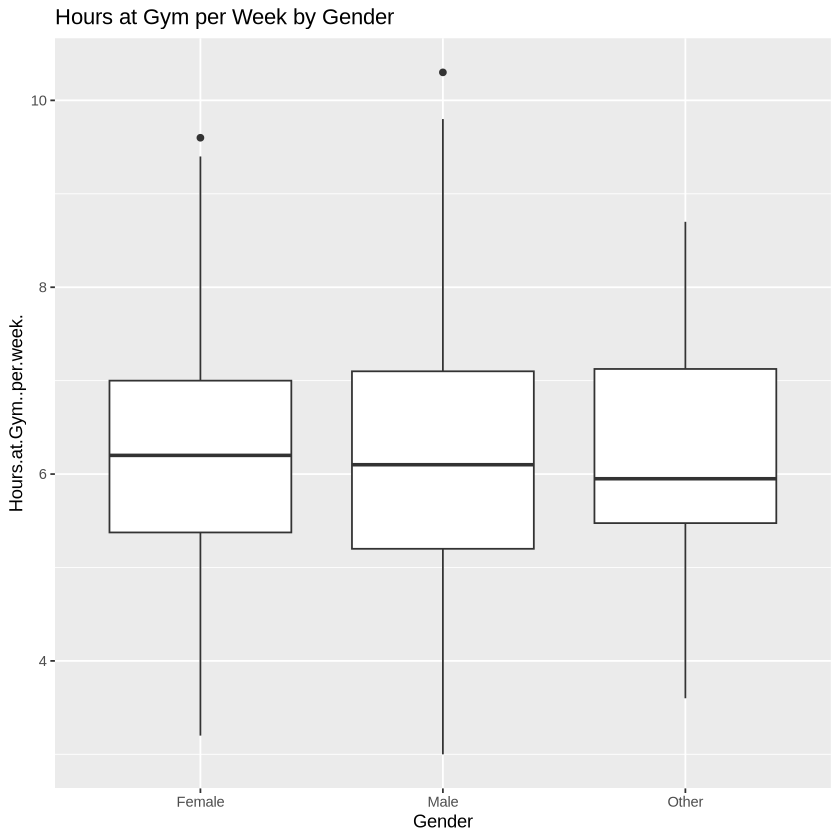

In [25]:
library(ggplot2)

# Boxplot for Hours at Gym per Week by Fitness Goal
ggplot(integrated_data, aes(x = Fitness.Goal, y = Hours.at.Gym..per.week.)) +
  geom_boxplot() +
  labs(title = "Hours at Gym per Week by Fitness Goal")

# Boxplot for Hours at Gym per Week by Dietary Preferences
ggplot(integrated_data, aes(x = Dietary.Preferences, y = Hours.at.Gym..per.week.)) +
  geom_boxplot() +
  labs(title = "Hours at Gym per Week by Dietary Preferences")

# Boxplot for Hours at Gym per Week by Gender
ggplot(integrated_data, aes(x = Gender, y = Hours.at.Gym..per.week.)) +
  geom_boxplot() +
  labs(title = "Hours at Gym per Week by Gender")

In [26]:
# Build a linear regression model
model_gym <- lm(Hours.at.Gym..per.week. ~ Age + Calorie.Intake + Gym.Membership.Length..years. +
                Average.Spend.per.Meal.Order + Average.Weekly.Consumption..Bottles. +
                Average.Spend.on.Apparel....year. + Fitness.Goal + Dietary.Preferences + Gender,
                data = integrated_data)

# Summarize the model
summary(model_gym)


Call:
lm(formula = Hours.at.Gym..per.week. ~ Age + Calorie.Intake + 
    Gym.Membership.Length..years. + Average.Spend.per.Meal.Order + 
    Average.Weekly.Consumption..Bottles. + Average.Spend.on.Apparel....year. + 
    Fitness.Goal + Dietary.Preferences + Gender, data = integrated_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.99051 -0.47818 -0.00105  0.50299  1.62585 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           6.6380291  0.4151291  15.990  < 2e-16 ***
Age                                  -0.0743211  0.0043809 -16.965  < 2e-16 ***
Calorie.Intake                       -0.0003559  0.0001538  -2.314  0.02089 *  
Gym.Membership.Length..years.         0.4793096  0.0137170  34.943  < 2e-16 ***
Average.Spend.per.Meal.Order          0.0106064  0.0038951   2.723  0.00659 ** 
Average.Weekly.Consumption..Bottles.  0.0519027  0.0091730   5.658 2.04e-08 ***
Average.Spend.on.Apparel....ye

In [27]:
# Calculate the average Hours.at.Gym..per.week. for each combination of Fitness.Goal and Dietary.Preferences
group_means_gym <- integrated_data %>%
  group_by(Fitness.Goal, Dietary.Preferences) %>%
  summarise(mean_hours_gym = mean(Hours.at.Gym..per.week., na.rm = TRUE), .groups = 'drop')

# Fill in missing Hours.at.Gym..per.week. values based on group means
integrated_data <- integrated_data %>%
  left_join(group_means_gym, by = c("Fitness.Goal", "Dietary.Preferences")) %>%
  mutate(Hours.at.Gym..per.week. = ifelse(is.na(Hours.at.Gym..per.week.), mean_hours_gym, Hours.at.Gym..per.week.)) %>%
  select(-mean_hours_gym) # Remove the temporary column

# Verify the result
sum(is.na(integrated_data$Hours.at.Gym..per.week.))

[1] 0

In [28]:
colSums(is.na(integrated_data))

Customer.ID                               Gender 
                                   0                                    0 
                                 Age              Hours.at.Gym..per.week. 
                                   0                                    0 
                        Fitness.Goal        Gym.Membership.Length..years. 
                                   0                                    0 
                 Dietary.Preferences         Average.Spend.per.Meal.Order 
                                   0                                    0 
         Preferred.Sports.Drink.Type Average.Weekly.Consumption..Bottles. 
                                   0                                    0 
   Average.Spend.on.Apparel....year.            Type.of.Apparel.Purchased 
                                   0                                    0 
    Primary.Apparel.Purchase.Channel                       Calorie.Intake 
                                   0                                    0

## Additional Visualizations

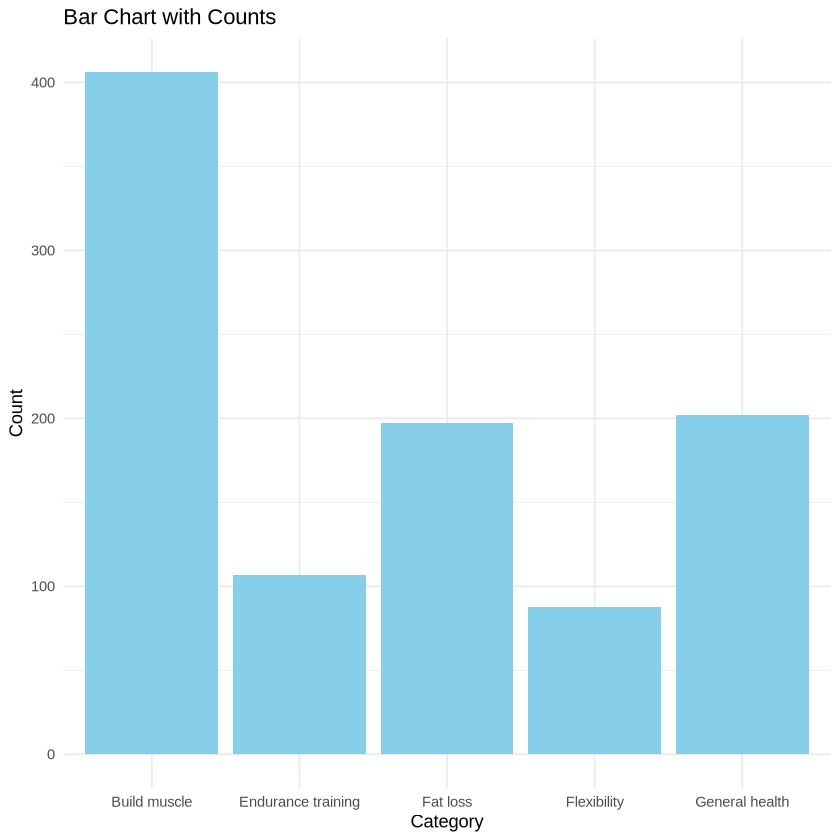

In [29]:
ggplot(integrated_data, aes(x = Fitness.Goal)) +
  geom_bar(fill = "skyblue") +
  labs(title = "Bar Chart with Counts", x = "Category", y = "Count") +
  theme_minimal()

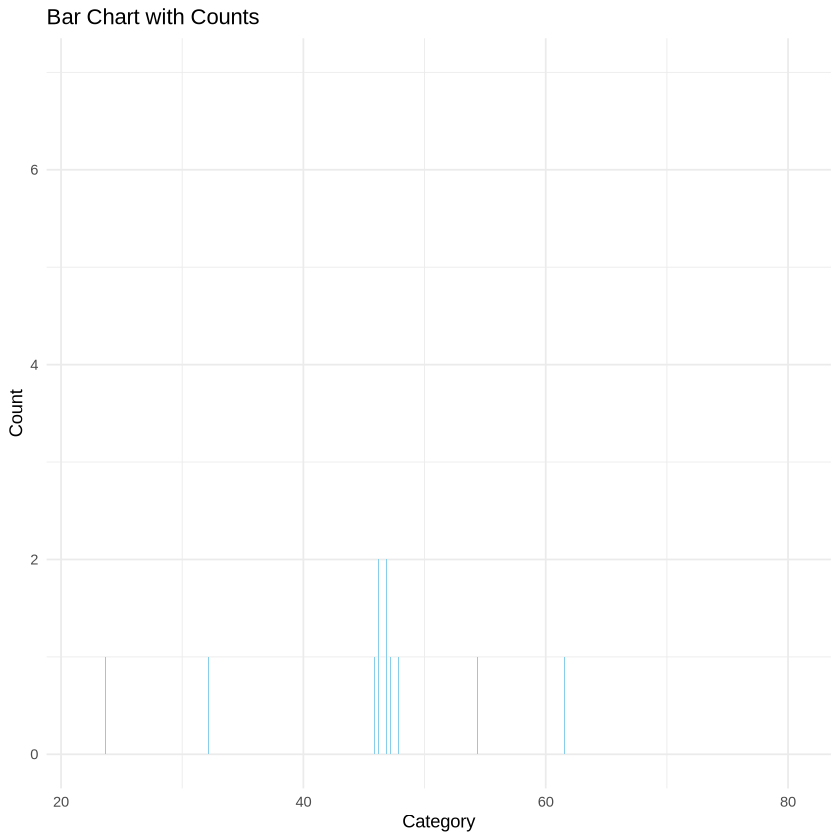

In [30]:
ggplot(integrated_data, aes(x = Average.Spend.per.Meal.Order)) +
  geom_bar(fill = "skyblue") +
  labs(title = "Bar Chart with Counts", x = "Category", y = "Count") +
  theme_minimal()

Warning message:
“`position_stack()` requires non-overlapping x intervals.”


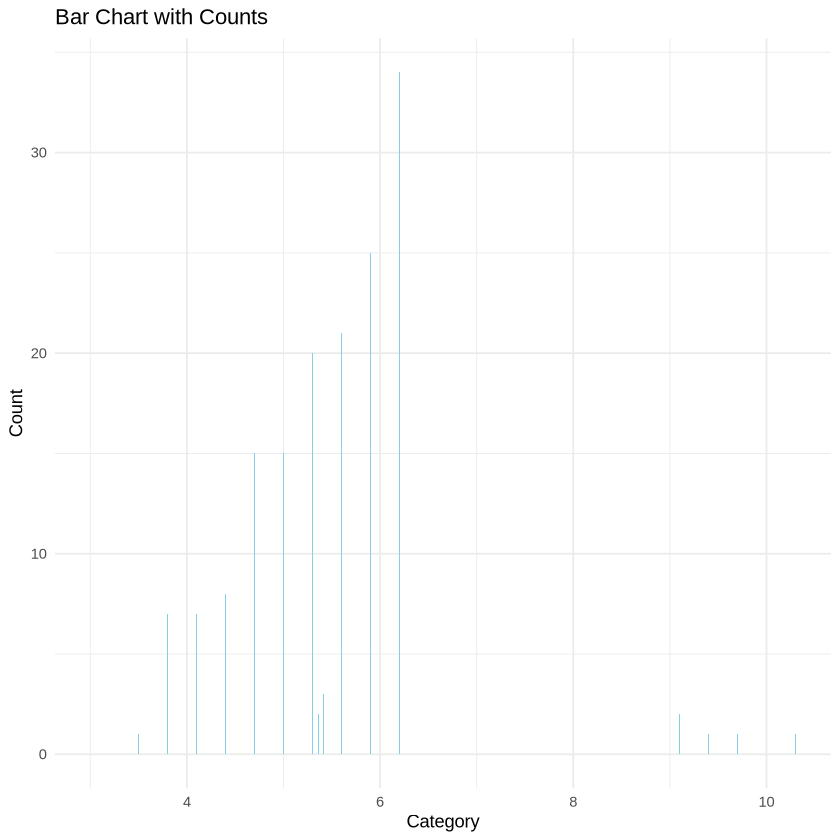

In [31]:
ggplot(integrated_data, aes(x = Hours.at.Gym..per.week.)) +
  geom_bar(fill = "skyblue") +
  labs(title = "Bar Chart with Counts", x = "Category", y = "Count") +
  theme_minimal()

In [32]:
ggplot(integrated_data, aes(x = Calorie.Intake.x)) +
  geom_bar(fill = "skyblue") +
  labs(title = "Bar Chart with Counts", x = "Category", y = "Count") +
  theme_minimal()

ERROR while rich displaying an object: Error in `geom_bar()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'Calorie.Intake.x' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error